In [1]:
%load_ext autoreload
%autoreload 2

from cnn import CNN
from experiment import Experiment
from util import Util
from patch import Patch
from fixer import Fixer
from uglify import Uglify

from PIL import Image
import mahotas as mh
import numpy as np
import os
import cPickle as pickle
from string import Template
import shutil

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
input_vi = [
0.4564952265,
0.4293922557,
0.4181262577,
0.4176715561,
0.4907196995,
0.4620027692,
0.5851840841,
0.6340148263,
0.655254341,
0.5968352055
]

dojo_best_user = [
0.3764043166,
0.3516472472,
0.4079547444,
0.4530306854,
0.489459557,
0.4783714198,
0.4691797846,
0.4852945057,
0.4989719721,
0.4631116968

]

dojo_avg_user = [
0.4731860794,
0.4412143846,
0.4645102603,
0.4790327986,
0.5483534853,
0.5209529753,
0.5614397773,
0.5669964498,
0.6037881064,
0.5986637472

]


In [3]:
novice = [
  0.37012190195707095,
  0.38968960153287835,
  0.37045672764672943,
  0.38191441070762,
  0.45717155397457265,
  0.4307223374738305,
  0.46325236818430504,
  0.5049116191382206,
  0.45915778345523783,
  0.5901800985629162
]

# josh
expert1 = [
  0.37484603520770676,
  0.3939621266824016,
  0.3896524948878737,
  0.39639562518511084,
  0.4477210348104004,
  0.4647934798574145,
  0.4647357412387576,
  0.4583758825458508,
  0.42396064070850503,
  0.4060052118497355
]

# alyssa
expert2 = [
  0.36955775659747747,
  0.39250293829836735,
  0.3688303634072678,
  0.37744240803449625,
  0.40022644067826807,
  0.3815527838331203,
  0.4472774009966649,
  0.44162415508056707,
  0.4729849772418282,
  0.4966401210922369
]

In [17]:
simulated_user = [
  0.36469144760523253,
  0.3800517083459587,
  0.36488580658555847,
  0.3706597645645271,
  0.3973091017963517,
  0.3903271023568733,
  0.49296487907424513,
  0.47382503975664036,
  0.45760760586651106,
  0.4350097421573329
]

random_recommendations = [
  0.4595423295850365,
  0.4308474043605237,
  0.3986397439416596,
  0.39881363108964063,
  0.4774106038339303,
  0.47744847314733896,
  0.5331778295505849,
  0.5657477626512799,
  0.6298385736857668,
  0.5383586601809531
]

automatic = [
 0.38255406726973096,
 0.39475205397438984,
 0.37838898717369673,
 0.4271712450368943,
 0.3975991144058071,
 0.8186454056420018,
 0.7259866556400247,
 0.6007895383730038,
 0.5680060332011188,
 1.0475679727790466
]

automatic_new = [0.3737786615798342,
 0.394548115049429,
 0.4611100240446344,
 0.42946009966927434,
 0.45653426673149156,
 0.7313827147492598,
 0.6626228951383597,
 0.8701369111170498,
 0.7400183520925676,
 0.8747261709437684]

automatic_99 = [0.38935011660463914,
 0.39614178931687327,
 0.44525021815657784,
 0.4095345589515391,
 0.45651847457905426,
 0.6561403238145589,
 0.6859273480311536,
 0.6321847890378809,
 0.6057350436997373,
 0.724804978183407]

In [18]:
data = [input_vi,
        dojo_avg_user,
        dojo_best_user, 
        novice,
        expert1,
        expert2,
        simulated_user,        
        random_recommendations,        
        automatic_99
       ]
median_input_vi = np.median(input_vi)

In [19]:
for d in data:
    print np.median(d)

0.47636123435
0.5346532303
0.4661457407
0.443946945724
0.414982926279
0.396364689488
0.393818102077
0.477429538491
0.531126759139


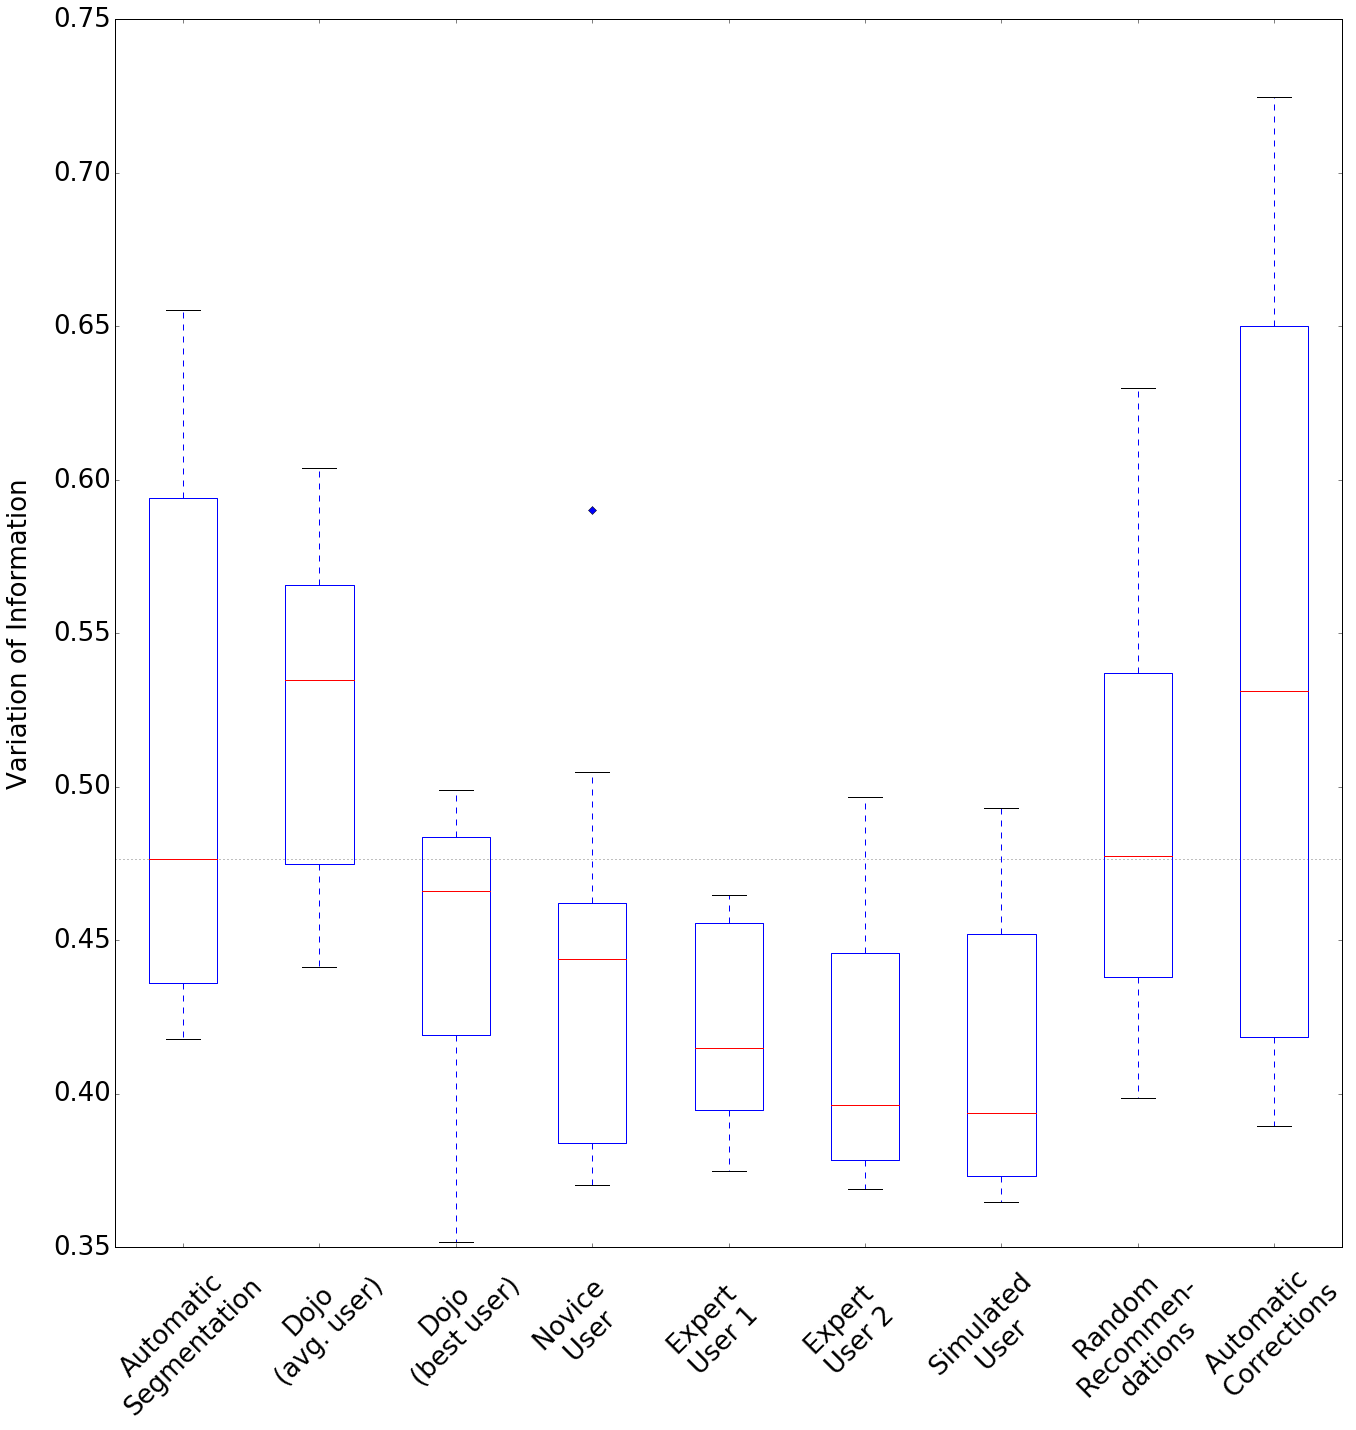

In [20]:


fig, ax = plt.subplots(figsize=(22,22))
ax.plot(range(12), [median_input_vi]*12, 'k:' , color='gray', label='Avg. input VI')

objects = ['Automatic\nSegmentation',
           'Dojo\n(avg. user)', 
           'Dojo\n(best user)',
           'Novice    \nUser    ',
           'Expert     \nUser 1     ',
           'Expert     \nUser 2     ',
           'Simulated   \nUser   ',
           'Random\nRecommen-\ndations',
           'Automatic  \nCorrections ' ]

y_pos = range(1,len(objects)+1)


plt.ylabel('Variation of Information', labelpad=20)

plt.setp(plt.xticks()[1], rotation=45)

font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
plt.boxplot(data, 0, 'gD', whis=1.5)
plt.xticks(y_pos, objects)
plt.savefig('/home/d/Projects/em-quality-metric/Paper/gfx/all_users_vi_dojo.pdf')

plt.show()

In [ ]:
error_rate_results = [0.39417157822328769,
 0.44262754641950181,
 0.43724463773450906,
 0.48556718867826865,
 0.50630356217978378,
 0.55273909257832943,
 0.63664689837735555,
 0.67180684794910195,
 0.69650814514403092,
 0.94271129915217666]

In [88]:
user_guided_limit = [0.40076329105517683,
 0.3796133639632817,
 0.3661324596544393,
 0.39954443665185035,
 0.3989458726301276,
 0.44621284364966485,
 0.5533729484432053,
 0.5830389613197342,
 0.6172253790488922,
 0.5607300536090216]

In [167]:
error_rate_results = [0.46831988319320567,
 0.47568821586553656,
 0.47480018245646222,
 0.47514757971068072,
 0.4723591055218509,
 0.48913374148222016,
 0.49529540585568893,
 0.49193532618234415,
 0.5066160832826071,
 0.49621513360118585]

In [175]:
error_rate_results = [0.42612450803378632,
 0.46296617139544072,
 0.44995441243875023,
 0.45502578739372401,
 0.43752289166950975,
 0.45261827858947168,
 0.46369569416586565,
 0.45728723762254075,
 0.47940199025731012,
 0.48589741139750675]

In [164]:
error_rate_results =[0.46831988319320567,
 0.49412464595432271,
 0.47950088450191053,
 0.5665148338944761,
 0.54793601660018354]

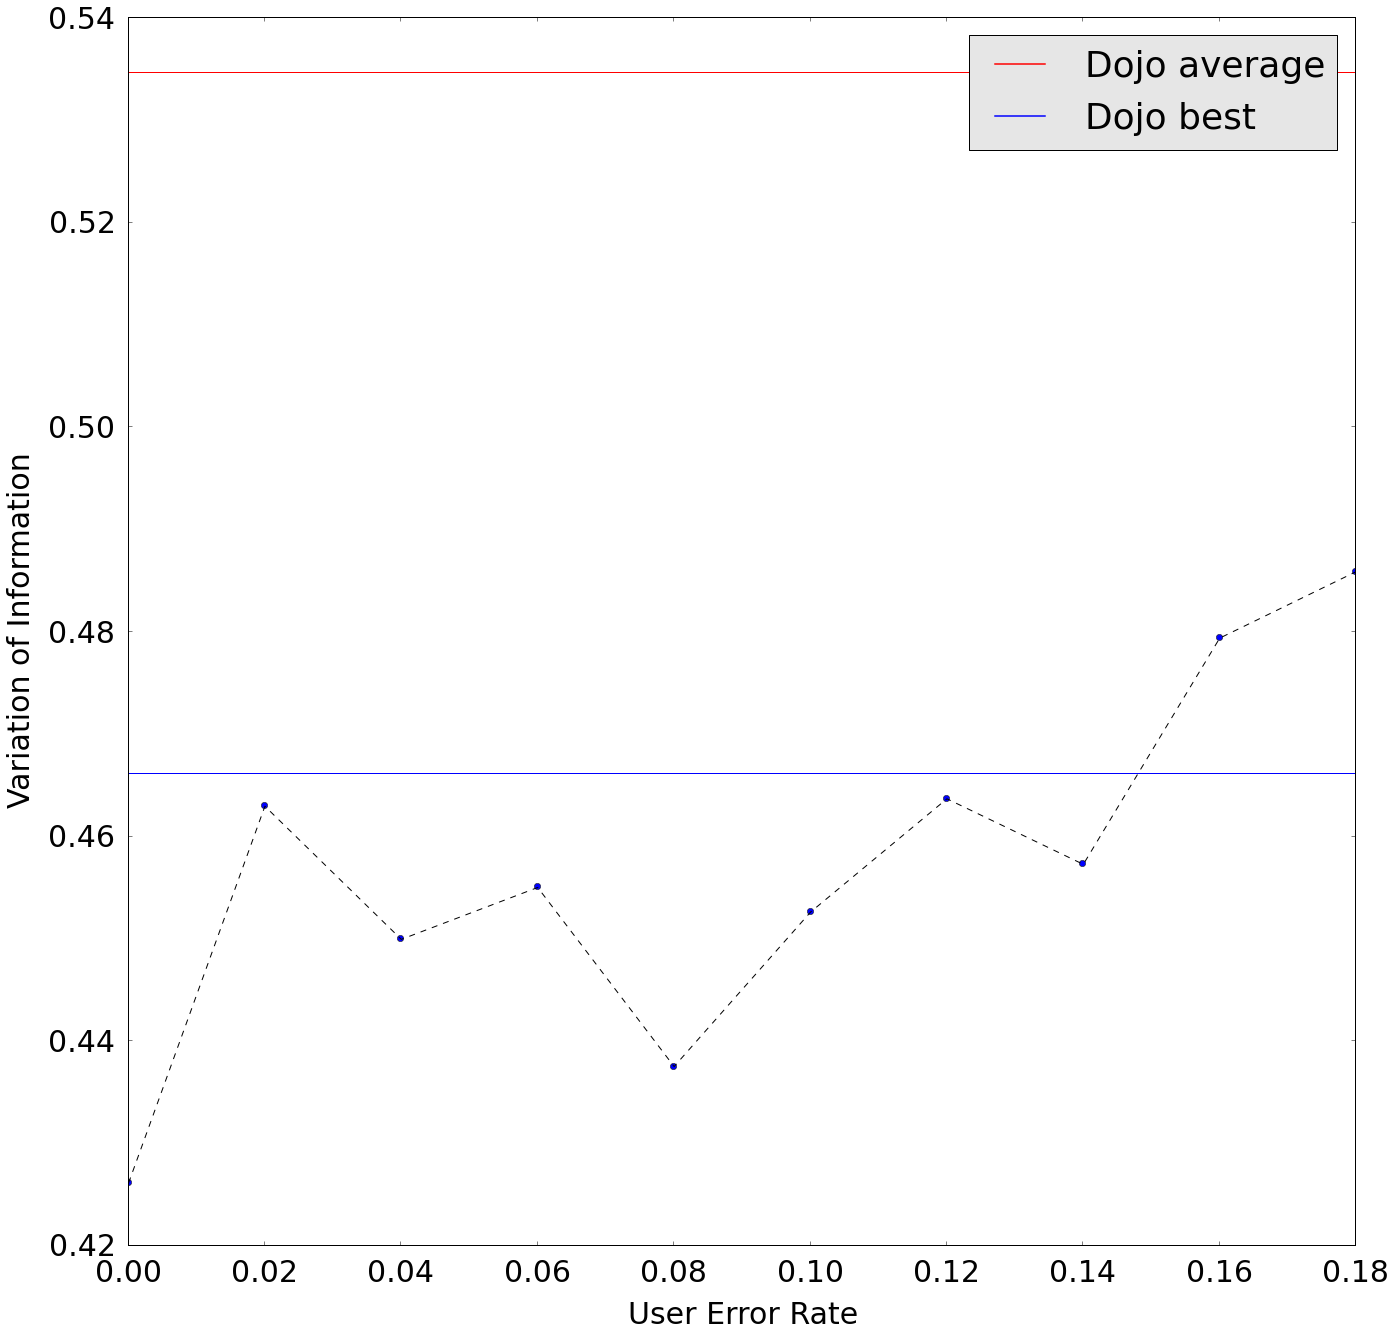

In [179]:
x_labels = range(10)
x_labels = [2*l/100. for l in x_labels]# for l in x_labels:
    
fig, ax = plt.subplots(figsize=(22,22))
ax.plot(x_labels, error_rate_results, 'o')

ax.plot(x_labels, error_rate_results, 'k--')
# ax.plot(epochs, validation_loss, 'k:', label='Validation Loss')
# ax.plot(epochs, validation_acc, 'k', label='Validation Accuracy')
# ax.set_yscale('log')
# ax.plot(range(10), error_rate_results, 'o', label='Training Loss')
# plt.boxplot(error_rate_results)
# Now add the legend with some customizations.
ax.plot(x_labels, [dojo_avg_user_mean]*10, 'k', label='Dojo average', color='red')
ax.plot(x_labels, [dojo_best_user_mean]*10, 'k', label='Dojo best', color='blue')
legend = ax.legend(loc='upper right', shadow=False)
ax.tick_params(axis='both', which='major', pad=15)
plt.ylabel('Variation of Information', labelpad=20)
plt.xlabel('User Error Rate', labelpad=20)
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 60}

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

# plt.savefig(OUTPUT_PATH+os.sep+'graph_'+str(epoch)+'.png')
plt.savefig('/tmp/out_er.pdf')

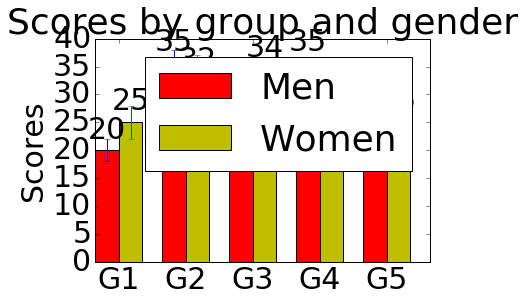

In [23]:

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

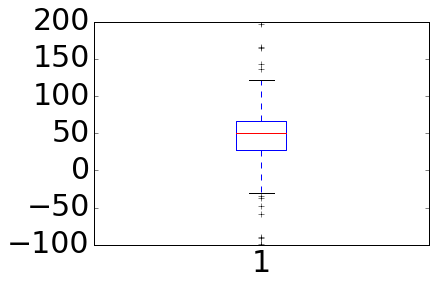

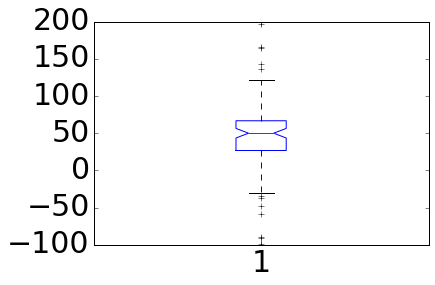

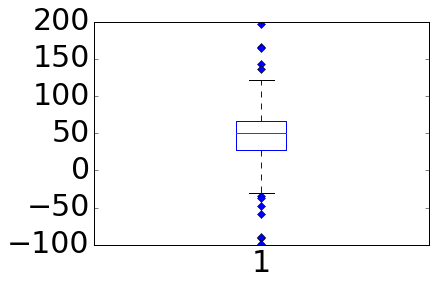

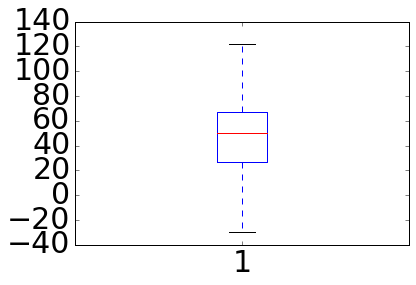

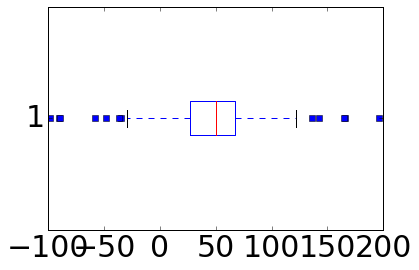

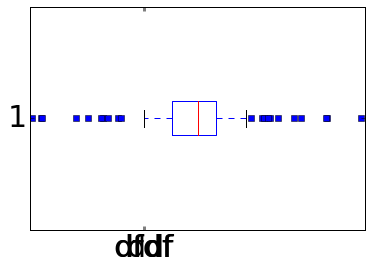

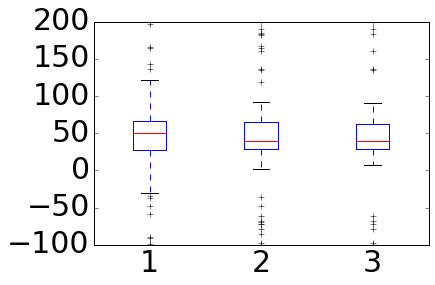

In [38]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(data)

# notched plot
plt.figure()
plt.boxplot(data, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(data, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(data, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(data, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(data, 0, 'rs', 0, 0.75)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
plt.xticks([1,2,3],['dfdf','dfdf','dd'])
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

plt.show()

([<matplotlib.axis.XTick at 0x7fed657fae10>,
 <a list of 3 Text xticklabel objects>)

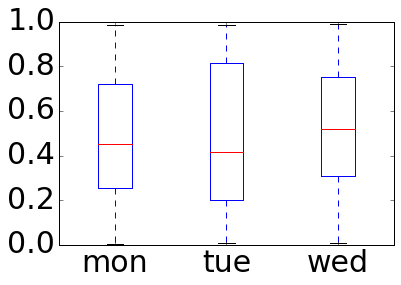

In [44]:
data = [[np.random.rand(100)] for i in range(3)]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['mon', 'tue', 'wed'])